In [9]:
!pip install unzip

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1289 sha256=57c3e9c1dbe5eba65e9687b44625f8ba996e8535e53f6f3a315f884deb0f1529
  Stored in directory: c:\users\mitsy\appdata\local\pip\cache\wheels\fb\5b\81\0f3e1e533b52883f88ab978178c15627a4fce4c13f74911dce
Successfully built unzip


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

In [7]:
!kaggle datasets download -d arshkon/linkedin-job-postings

Dataset URL: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings
License(s): CC-BY-SA-4.0




  0%|          | 0.00/159M [00:00<?, ?B/s]
 47%|████▋     | 74.0M/159M [00:00<00:00, 753MB/s]
 92%|█████████▏| 146M/159M [00:00<00:00, 628MB/s] 
100%|██████████| 159M/159M [00:00<00:00, 625MB/s]


# Company Industries

In [14]:
company_ind = pd.read_csv(r"C:\Users\Mitsy\itcs6190\ITCS6190-Course-Project\data\companies\company_industries.csv")
display(company_ind.info(),
        company_ind.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24375 entries, 0 to 24374
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company_id  24375 non-null  int64 
 1   industry    24375 non-null  object
dtypes: int64(1), object(1)
memory usage: 381.0+ KB


None

,company_id,industry
0,391906,Book and Periodical Publishing
1,22292832,Construction
2,20300,Banking
3,3570660,Book and Periodical Publishing
4,878353,Staffing and Recruiting


In [15]:
company_ind['company_id'].value_counts()

company_id
1687254     2
2471716     2
69192017    2
27292       2
2831596     2
           ..
37067372    1
33267093    1
9183828     1
165970      1
8060959     1
Name: count, Length: 24365, dtype: int64

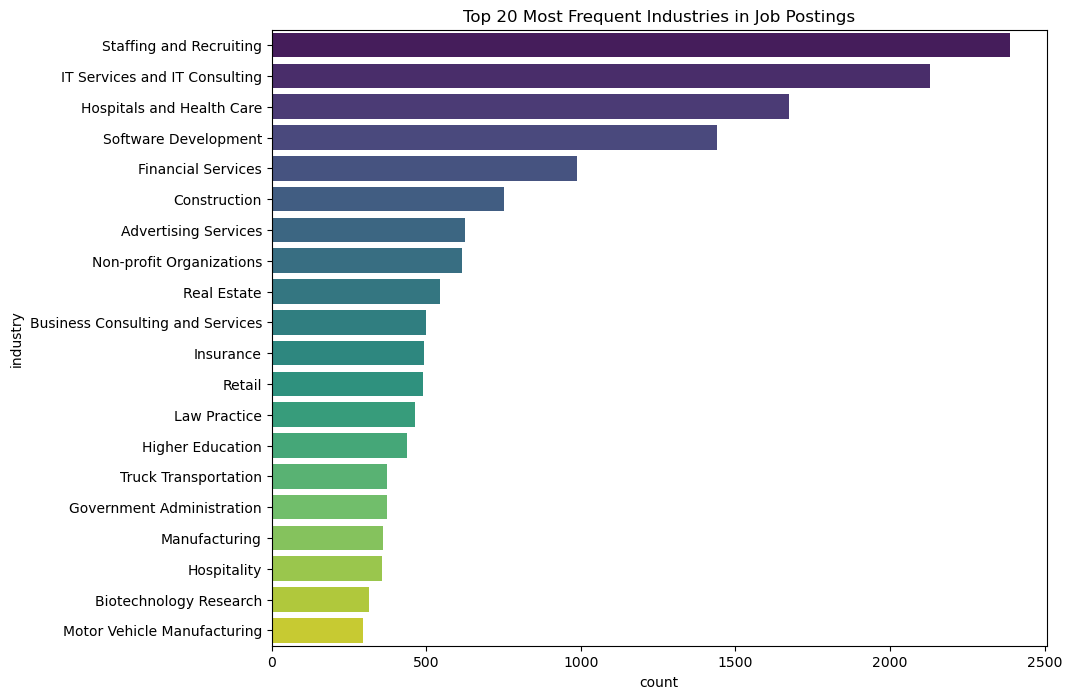

In [16]:
ind_freq = company_ind["industry"].value_counts().to_frame().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(ind_freq.iloc[:20,:], x="count", y="industry", hue="industry", palette="viridis",)
plt.title("Top 20 Most Frequent Industries in Job Postings")
plt.show()

# Company Specialities 

In [17]:
comp_spl = pd.read_csv(r"C:\Users\Mitsy\itcs6190\ITCS6190-Course-Project\data\companies\company_specialities.csv")
display(comp_spl.info(), comp_spl.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169387 entries, 0 to 169386
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   company_id  169387 non-null  int64 
 1   speciality  169387 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.6+ MB


None

,company_id,speciality
0,22292832,window replacement
1,22292832,patio door replacement
2,20300,Commercial Banking
3,20300,Retail Banking
4,20300,Mortgage


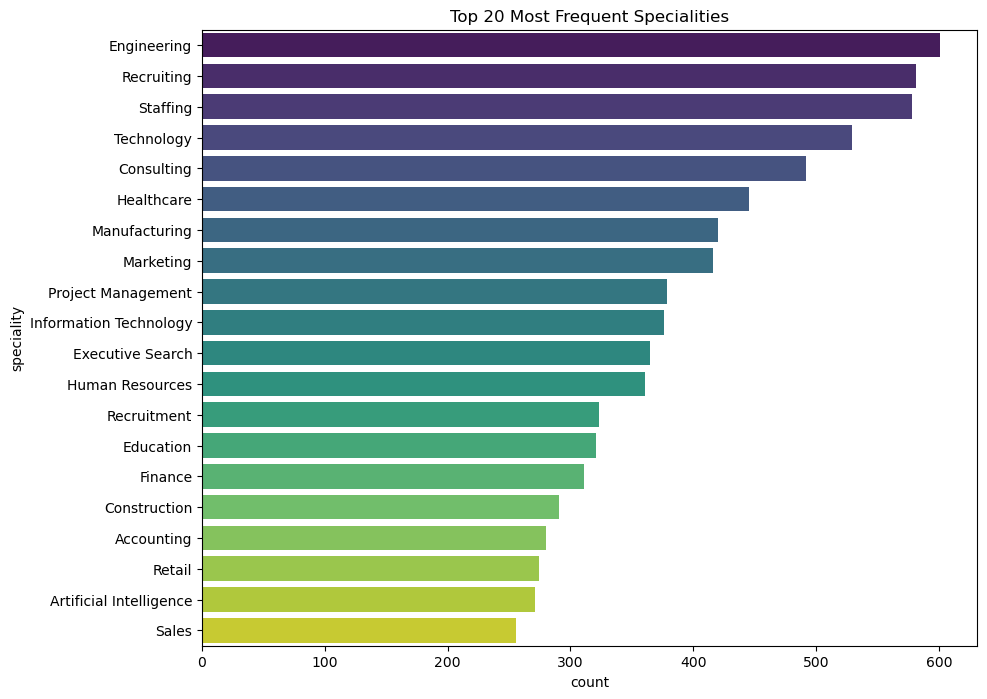

In [18]:
spl_freq = comp_spl["speciality"].value_counts().to_frame().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(spl_freq.iloc[:20,:], x="count", y="speciality", hue="speciality", palette="viridis",)
plt.title("Top 20 Most Frequent Specialities")
plt.show()

# Job Industries

In [20]:
job_ind = pd.read_csv(r"C:\Users\Mitsy\itcs6190\ITCS6190-Course-Project\data\jobs\job_industries.csv")
display(job_ind.info(), job_ind.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164808 entries, 0 to 164807
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   job_id       164808 non-null  int64
 1   industry_id  164808 non-null  int64
dtypes: int64(2)
memory usage: 2.5 MB


None

,job_id,industry_id
0,3884428798,82
1,3887473071,48
2,3887465684,41
3,3887467939,82
4,3887467939,80


In [33]:
job_ind['industry_id'].value_counts()

industry_id
14      18326
27      11033
96      10396
104      9005
43       8535
        ...  
3199        1
616         1
2360        1
2163        1
799         1
Name: count, Length: 422, dtype: int64

In [21]:
ind_map = pd.read_csv(r'C:\Users\Mitsy\itcs6190\ITCS6190-Course-Project\data\mappings\industries.csv')
display(ind_map.info(),ind_map.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry_id    422 non-null    int64 
 1   industry_name  388 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.7+ KB


None

,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"


In [22]:
#drop the null values
ind_map = ind_map.dropna()
ind_map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 421
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry_id    388 non-null    int64 
 1   industry_name  388 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.1+ KB


In [23]:
#inner join with job_ind and ind_map on industry_id
job_ind_map = pd.merge(job_ind, ind_map, on='industry_id', how='inner')
display(job_ind_map.info(), job_ind_map.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164708 entries, 0 to 164707
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   job_id         164708 non-null  int64 
 1   industry_id    164708 non-null  int64 
 2   industry_name  164708 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.8+ MB


None

,job_id,industry_id,industry_name
0,3884428798,82,Book and Periodical Publishing
1,3887473071,48,Construction
2,3887465684,41,Banking
3,3887467939,82,Book and Periodical Publishing
4,3887467939,80,Advertising Services


Text(0.5, 1.0, 'Top 20 Most Frequent Industries in Job Postings')

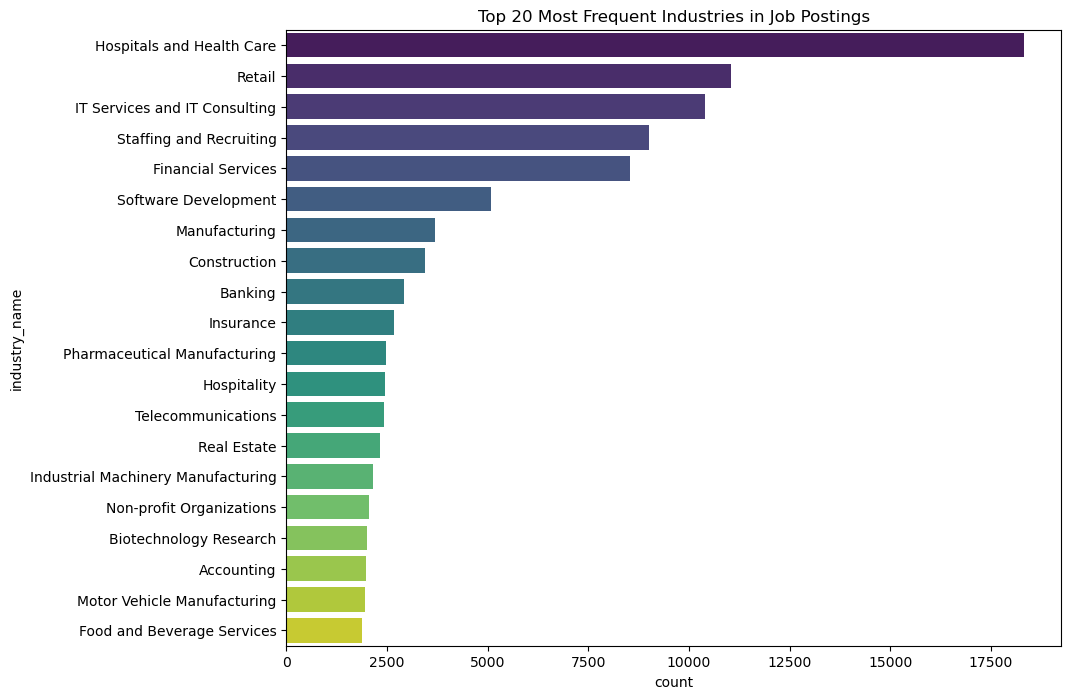

In [24]:
# plot the top 20 industries in job_ind_map
ind_freq = job_ind_map["industry_name"].value_counts().to_frame().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(ind_freq.iloc[:20,:], x="count", y="industry_name", hue="industry_name", palette="viridis",)
plt.title("Top 20 Most Frequent Industries in Job Postings")

# Job Skills

In [25]:
job_skill = pd.read_csv(r"C:\Users\Mitsy\itcs6190\ITCS6190-Course-Project\data\jobs\job_skills.csv")
display(job_skill.info(), job_skill.head(), job_skill['skill_abr'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213768 entries, 0 to 213767
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   job_id     213768 non-null  int64 
 1   skill_abr  213768 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


None

,job_id,skill_abr
0,3884428798,MRKT
1,3884428798,PR
2,3884428798,WRT
3,3887473071,SALE
4,3887465684,FIN


35

In [26]:
skill_map = pd.read_csv(r'C:\Users\Mitsy\itcs6190\ITCS6190-Course-Project\data\mappings\skills.csv')
display(skill_map.info(), skill_map.head(), skill_map["skill_name"].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   skill_abr   35 non-null     object
 1   skill_name  35 non-null     object
dtypes: object(2)
memory usage: 692.0+ bytes


None

,skill_abr,skill_name
0,ART,Art/Creative
1,DSGN,Design
2,ADVR,Advertising
3,PRDM,Product Management
4,DIST,Distribution


35

In [27]:
# join job_skill and skill_map on skill_abr 
job_skill_map = pd.merge(job_skill, skill_map, on='skill_abr', how='inner')
display(job_skill_map.info(), job_skill_map.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213768 entries, 0 to 213767
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   job_id      213768 non-null  int64 
 1   skill_abr   213768 non-null  object
 2   skill_name  213768 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


None

,job_id,skill_abr,skill_name
0,3884428798,MRKT,Marketing
1,3884428798,PR,Public Relations
2,3884428798,WRT,Writing/Editing
3,3887473071,SALE,Sales
4,3887465684,FIN,Finance


C:\Users\Mitsy\AppData\Local\Temp\ipykernel_19816\2794221998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_skill_freq, y='skill_name', x='count', palette='viridis')


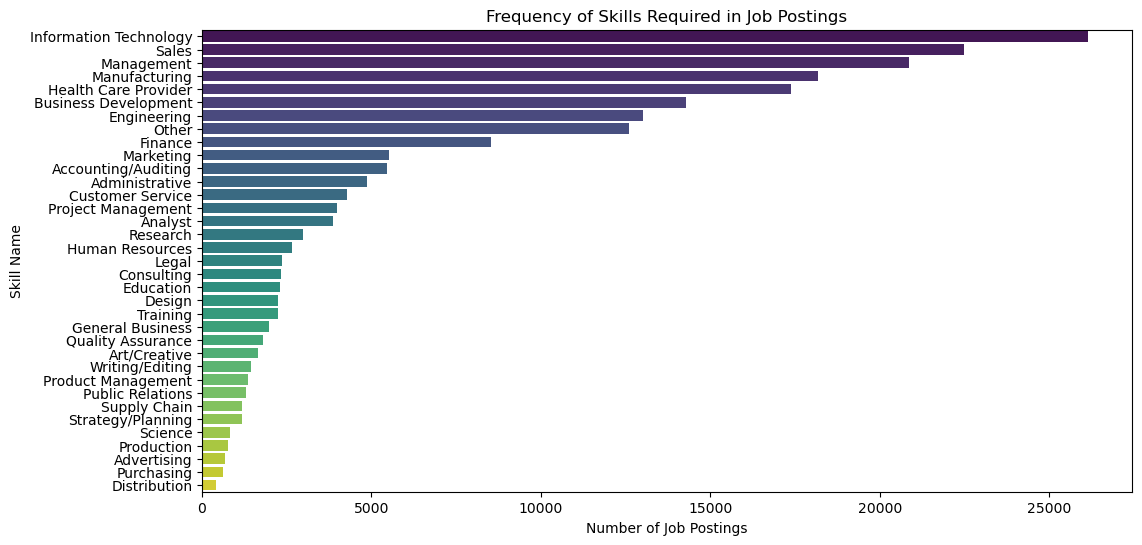

In [28]:
# freq plot of skills required in job postings
job_skill_freq = job_skill_map['skill_name'].value_counts().to_frame().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=job_skill_freq, y='skill_name', x='count', palette='viridis')
plt.title('Frequency of Skills Required in Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Skill Name')
plt.show()

# Postings

In [39]:
postings = pd.read_csv(r"C:\Users\Mitsy\itcs6190\ITCS6190-Course-Project\data\postings.csv")
display(postings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

None

In [31]:
postings.iloc[0,:]

job_id                                                                   921716
company_name                                              Corcoran Sawyer Smith
title                                                     Marketing Coordinator
description                   Job descriptionA leading real estate firm in N...
max_salary                                                                 20.0
pay_period                                                               HOURLY
location                                                          Princeton, NJ
company_id                                                            2774458.0
views                                                                      20.0
med_salary                                                                  NaN
min_salary                                                                 17.0
formatted_work_type                                                   Full-time
applies                                 

In [40]:
#dropping all unnecessary column
postings.drop(["max_salary", "pay_period","med_salary","min_salary", "applies", "original_listed_time", "remote_allowed", 
                "job_posting_url", "application_url", "expiry", "closed_time", "skills_desc",
                "listed_time", "work_type", "currency", "compensation_type", "normalized_salary", "fips"], axis=1, inplace=True)

In [41]:
postings = postings.dropna()

In [42]:
display(postings.head(), postings.shape)

,job_id,company_name,title,description,location,company_id,views,formatted_work_type,application_type,formatted_experience_level,posting_domain,sponsored,zip_code
102,3018278978,Aston Carter,Seasonal Office Administrator,Seasonal Office Admin\n\nResponsibilities\n\nW...,"Dayton, OR",13153.0,279.0,Contract,OffsiteApply,Entry level,jsv3.recruitics.com,0,97114.0
322,3778723781,Northeast Georgia Health System,Registered Nurse RN - Medical ICU MICU - PT Ni...,Job Category:\n\nNursing - Registered Nurse\n\...,"Gainesville, GA",120000.0,386.0,Part-time,OffsiteApply,Mid-Senior level,nghs.wd1.myworkdayjobs.com,0,30501.0
357,3795149962,Georgia Tech Research Institute,"Field Office ISSM - Open Rank-RS-Albuquerque, NM",Overview\n\nThe Georgia Tech Research Institut...,"Albuquerque, NM",3557.0,450.0,Full-time,OffsiteApply,Entry level,careers.gtri.gatech.edu,0,87101.0
358,3795156068,Georgia Tech Research Institute,"Field Office ISSM - Open Rank-RS-Albuquerque, NM",Overview\n\nThe Georgia Tech Research Institut...,"Albuquerque, NM",3557.0,455.0,Full-time,OffsiteApply,Entry level,careers.gtri.gatech.edu,0,87101.0
387,3812814309,AstraZeneca,"Senior Director, Clinical Pharmacology & Quant...","Senior Director, Clinical Pharmacology & Quant...","Gaithersburg, MD",1603.0,687.0,Full-time,OffsiteApply,Mid-Senior level,astrazeneca.wd3.myworkdayjobs.com,0,20877.0


(61559, 13)

In [45]:
postings.iloc[10,3]

"Job Description\n\nBalance Life & Work with a New Career Opportunity\n\n(LONG TERM CARE)\n\n(SHORT TERM REHAB)\n\n(SKILLED NURSING)\n\n(ASSISTED LIVING)\n\n(LTACH)\n\n(SUB ACUTE CARE)\n\nNow Hiring - Business Office Manager - Lexington, MA 02420\n\nCareOne at Lexington\n\nThe Business Office Manager will be responsible for, but not limited to:\n\nVerifying daily CensusVerify all billing and financial data for new admissionsMedicare A & B Billing, Claims Corrections and Follow-upManaged Care , Claims Corrections and Follow-upPrivate Pay Billing and Collections. Medicaid Application AssistancePayment Processing, Reconciliation, and ReportingAccount Adjustment and ReconciliationAccounts Receivable Month-end ClosingMedicare Bad Debt ProcessingAccounts Receivable Monitoring and AnalysisRefund ProcessingManagement, Control and Reconciliation of the Residents Needs AccountFinancial Cycle Oversight: Accounts Payable, Purchasing, and PayrollStaff Training and Professional DevelopmentSupervisin

In [47]:
postings.to_csv(r"C:\Users\Mitsy\itcs6190\ITCS6190-Course-Project\data\postings_cleaned.csv")